In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [41]:
# Read the mouse data and the study results:
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
#mouse_metadata
study_results= pd.read_csv("data/Study_results.csv")



In [42]:
# Combine the data into a single dataset:
mice_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
mice_results_df = mice_results
mice_results_df.head()


# Display the data table for preview
mice_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice.
mouse_total = mice_results_df["Mouse ID"].nunique()
mouse_total

249

In [44]:
# Checking for missing values:
mice_results_df.isnull().sum()


Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False
                          )

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [46]:
dup_mouse_id = mice_results_df.loc[mice_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dup_mouse_id)

['g989']


In [47]:
# Get all the data for the duplicate mouse ID
dup_mouse_df = mice_results_df.loc[mice_results_df["Mouse ID"] == "g989", :]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mice_results_df[mice_results_df['Mouse ID'].isin(dup_mouse_id)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Recheck the number of mice to make sure g989 is droppped
new_total_mice = clean_mouse_df["Mouse ID"].nunique()
new_total_mice




248

# Summary Statistics


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std_dev = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                               "Tumor Volume Variance": var, "Tumor Volume Std. Dev": std_dev,
                           "Tumor Volume Std. Err": sem})

summary_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# # Using the aggregation method, produce the same summary statistics in a single line
# sum_stat_agg = clean_mouse_df.groupby(["Tumor Volume (mm3)"])[["Drug Regimen"]].agg
# ("mean", "median", "var", "std", "sem")
# sum_stat_agg



# Bar and Pie Charts



In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# first need to calculate total no. of rows per Drug regimen
dreg_df = clean_mouse_df["Drug Regimen"].value_counts()
dreg_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

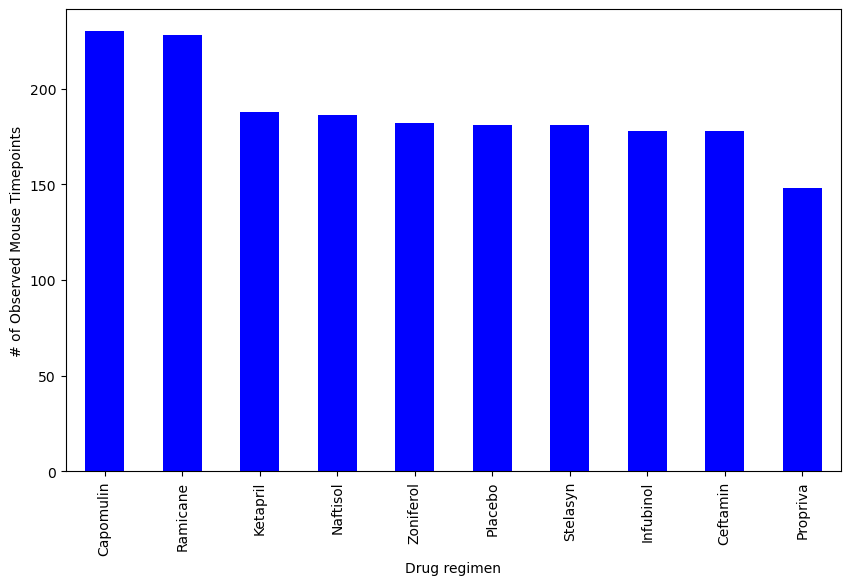

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dreg_df.plot(kind="bar", facecolor="blue", figsize=(10,6), xlabel ="Drug regimen",
                    ylabel = "# of Observed Mouse Timepoints")


dreg_df.pd DataFrame({"Drug Regimen":})

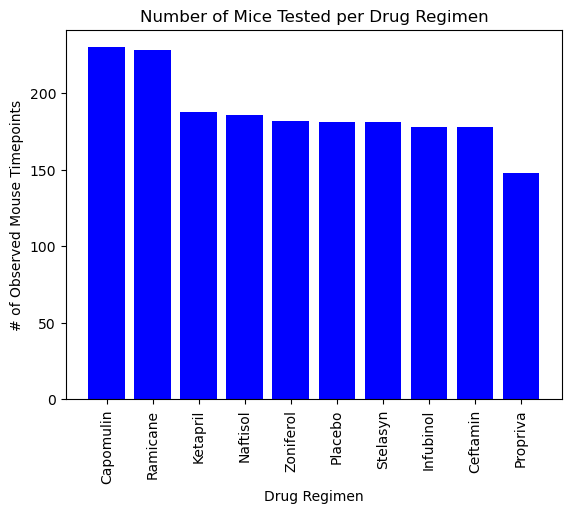

<Figure size 640x480 with 0 Axes>

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = dreg_df.index.values
y_axis = dreg_df.values

plt.bar(x_axis, y_axis, color="blue", alpha=1, align='center')
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()
plt.tight_layout()